<a href="https://www.arduino.cc/"><img src="https://raw.githubusercontent.com/sandeepmistry/aimldevfest-workshop-2019/master/images/Arduino_logo_R_highquality.png" width=200/></a>
# Tiny ML on Arduino
## Gesture recognition tutorial
 * Sandeep Mistry - Arduino
 * Don Coleman - Chariot Solutions

 
https://github.com/arduino/ArduinoTensorFlowLiteTutorials/

## Setup Python Environment 

The next cell sets up the dependencies in required for the notebook, run it.

In [2]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Open data and plot

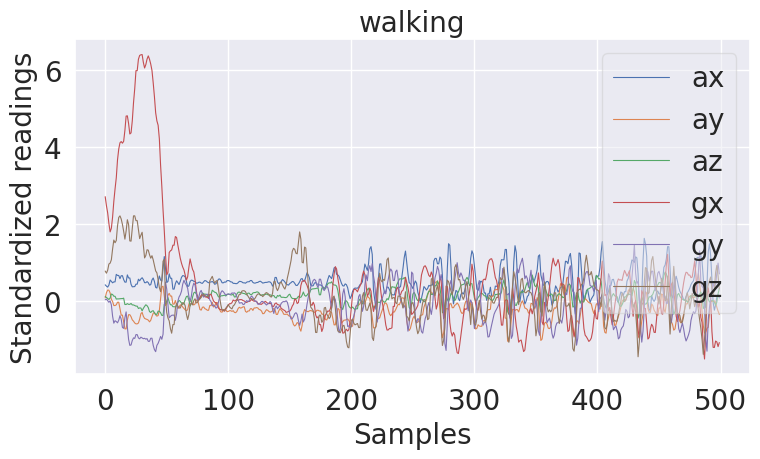

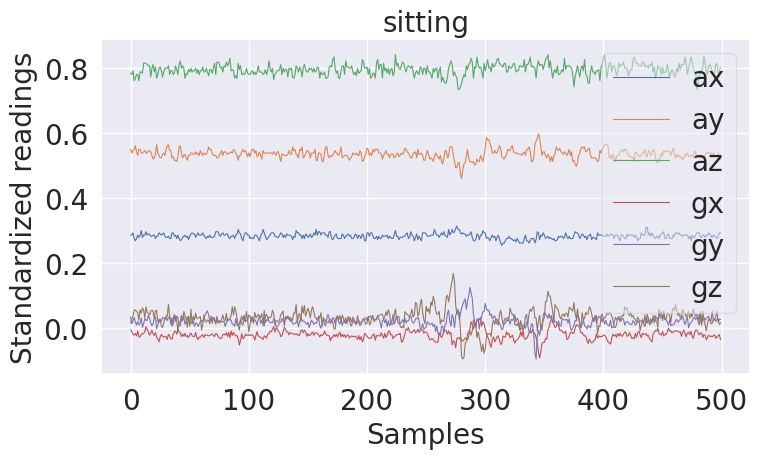

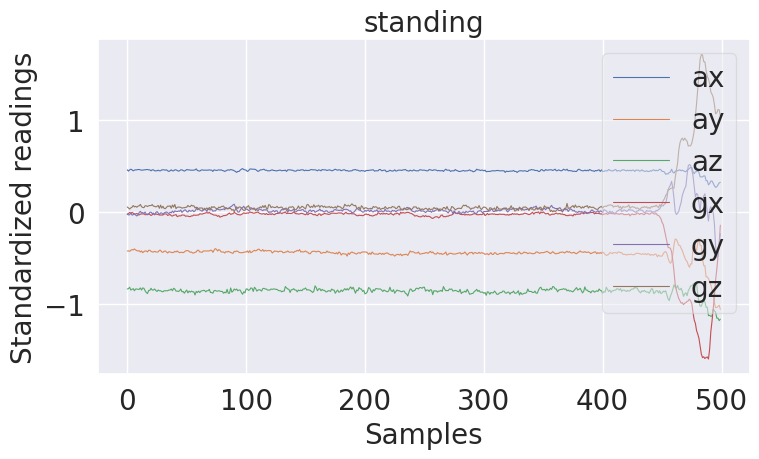

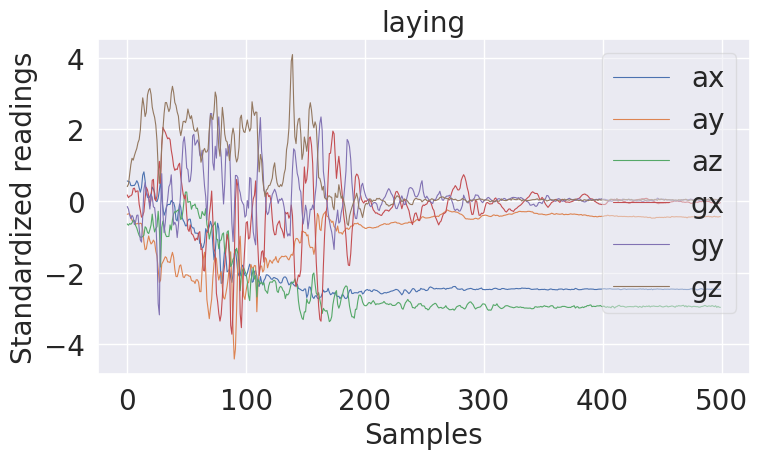

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from six.moves import cPickle as pkl
import seaborn as sns
sns.set_theme()

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

def open_data(file):
    with open(file, 'rb') as f:
        data = pkl.load(f)
    return data[0], data[1]

x_train, y_train = open_data('/content/drive/MyDrive/train_set.pkl')
x_test, y_test = open_data('/content/drive/MyDrive/test_set.pkl')
Keys = {0:'walking', 1:'walking_up', 2:'walking_down', 3:'sitting', 4:'standing', 5:'laying'}
plt.rcParams['font.size'] = '20'

for i in [0, 3, 4, 5]:
    ind = (y_test == i)
    x = (x_test[ind])[np.random.randint(ind.sum())]
    plt.figure(figsize=(8,5), dpi=100)
    plt.plot(x[:, 0], label='ax', linewidth=0.8)
    plt.plot(x[:, 1], label='ay', linewidth=0.8)
    plt.plot(x[:, 2], label='az', linewidth=0.8)
    plt.plot(x[:, 3], label='gx', linewidth=0.8)
    plt.plot(x[:, 4], label='gy', linewidth=0.8)
    plt.plot(x[:, 5], label='gz', linewidth=0.8)
    plt.xlabel('Samples')
    plt.ylabel('Standardized readings')
    plt.legend(loc=1, framealpha=0.5)
    plt.title(Keys[i])
    plt.tight_layout()
    plt.show()

# Train Neural Network





In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

SEED = 0
np.random.seed(SEED)
tf.random.set_seed(SEED)

Keys = {0:'walking', 1:'walking_up', 2:'walking_down', 3:'sitting', 4:'standing', 5:'laying'}
ACTIONS = list(Keys.values())

SAMPLES_PER_ACTION = 500
NUM_D = 6
NUM_ACTIONS = len(ACTIONS)
ONE_HOT_ENCODED_ACTIONS = np.eye(NUM_ACTIONS)

outputs = []
for i in range(len(x_train)):
  outputs.append(ONE_HOT_ENCODED_ACTIONS[y_train[i]]) 

x_train = np.array(x_train)
y_train = np.array(outputs)

outputs = []
for i in range(len(x_test)):
  outputs.append(ONE_HOT_ENCODED_ACTIONS[y_test[i]]) 

x_test = np.array(x_test)
y_test = np.array(outputs)

TensorFlow version = 2.9.2



## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

In [5]:
# build the model and train it
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Reshape((SAMPLES_PER_ACTION, NUM_D, 1), input_shape=(SAMPLES_PER_ACTION, NUM_D)))
# model.add(tf.keras.layers.Conv2D(32, (50,1), (2,1), activation='relu', input_shape=(SAMPLES_PER_ACTION, NUM_D, 1)))
# model.add(tf.keras.layers.Conv2D(32, (50,1), (2,1), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D((2,1)))
# model.add(tf.keras.layers.Conv2D(32, (5,1), (2,1), activation='relu'))
# model.add(tf.keras.layers.Conv2D(32, (5,1), (2,1), activation='relu'))
# model.add(tf.keras.layers.GlobalAveragePooling2D())
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(NUM_ACTIONS, activation='softmax'))
# model.summary()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((SAMPLES_PER_ACTION, NUM_D, 1), input_shape=(SAMPLES_PER_ACTION, NUM_D)))
model.add(tf.keras.layers.Conv2D(16, (50,1), (2,1), activation='relu', input_shape=(SAMPLES_PER_ACTION, NUM_D, 1)))
model.add(tf.keras.layers.Conv2D(16, (50,1), (2,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,1)))
model.add(tf.keras.layers.Conv2D(16, (5,1), (2,1), activation='relu'))
model.add(tf.keras.layers.Conv2D(16, (5,1), (2,1), activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(NUM_ACTIONS, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 500, 6, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 226, 6, 16)        816       
                                                                 
 conv2d_1 (Conv2D)           (None, 89, 6, 16)         12816     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 6, 16)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 6, 16)         1296      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 6, 16)          1296      
                                                        

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_crossentropy', 'accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
331/331 [==============================] - 10s 7ms/step - loss: 1.1757 - categorical_crossentropy: 1.1757 - accuracy: 0.4635 - val_loss: 0.5146 - val_categorical_crossentropy: 0.5146 - val_accuracy: 0.8719
Epoch 2/50
331/331 [==============================] - 2s 7ms/step - loss: 0.7099 - categorical_crossentropy: 0.7099 - accuracy: 0.6864 - val_loss: 0.3882 - val_categorical_crossentropy: 0.3882 - val_accuracy: 0.8736
Epoch 3/50
331/331 [==============================] - 3s 9ms/step - loss: 0.6190 - categorical_crossentropy: 0.6190 - accuracy: 0.7299 - val_loss: 0.3094 - val_categorical_crossentropy: 0.3094 - val_accuracy: 0.8966
Epoch 4/50
331/331 [==============================] - 2s 6ms/step - loss: 0.5553 - categorical_crossentropy: 0.5553 - accuracy: 0.7634 - val_loss: 0.2842 - val_categorical_crossentropy: 0.2842 - val_accuracy: 0.9080
Epoch 5/50
331/331 [==============================] - 2s 6ms/step - loss: 0.5219 - categorical_crossentropy: 0.5219 - accuracy: 0.7806 

In [7]:
# save model
model.save('/content/drive/MyDrive/model')

# Plot training curves

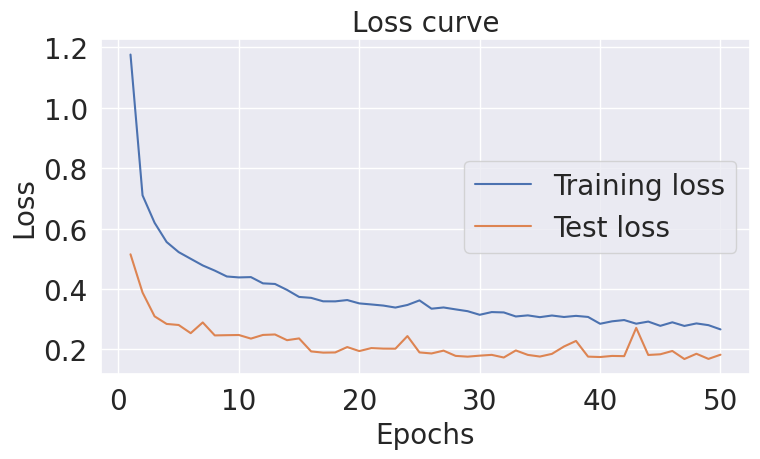

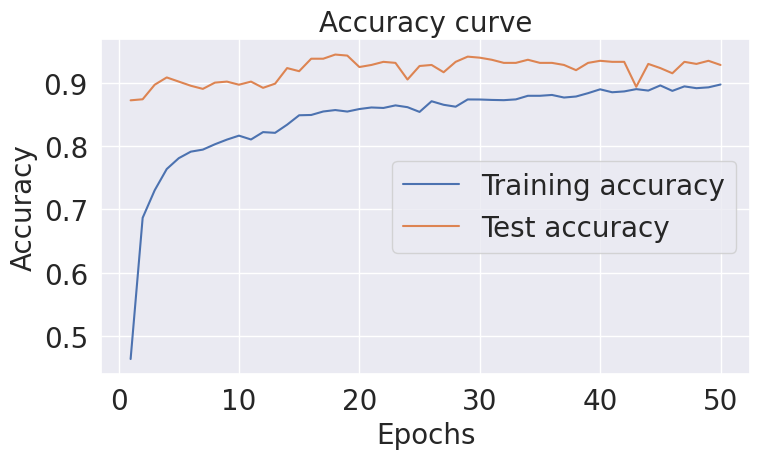

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8,5), dpi=100)
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Test loss')
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5), dpi=100)
epochs = range(1, len(loss) + 1)
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Test accuracy')
plt.title('Accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=5)
plt.tight_layout()
plt.show()

# Train Mixup model

In [18]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)

def mix_up(ds_one, ds_two, alpha=1.0):
    # Unpack two datasets
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.shape(images_one)[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = tf.cast(images_one, tf.float32) * x_l + tf.cast(images_two, tf.float32) * (1 - x_l)
    labels = tf.cast(labels_one, tf.float32) * y_l + tf.cast(labels_two, tf.float32) * (1 - y_l)
    return (images, labels)

train_ds_one = (tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(32))
train_ds_two = (tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(32))
train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))
train_ds_mu = train_ds.map(lambda ds_one, ds_two: mix_up(ds_one, ds_two, alpha=0.2))

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((SAMPLES_PER_ACTION, NUM_D, 1), input_shape=(SAMPLES_PER_ACTION, NUM_D)))
model.add(tf.keras.layers.Conv2D(16, (50,1), (2,1), activation='relu', input_shape=(SAMPLES_PER_ACTION, NUM_D, 1)))
model.add(tf.keras.layers.Conv2D(16, (50,1), (2,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,1)))
model.add(tf.keras.layers.Conv2D(16, (5,1), (2,1), activation='relu'))
model.add(tf.keras.layers.Conv2D(16, (5,1), (2,1), activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(NUM_ACTIONS, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_crossentropy', 'accuracy'])
history = model.fit(train_ds_mu, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
331/331 [==============================] - 4s 9ms/step - loss: 1.2578 - categorical_crossentropy: 1.2578 - accuracy: 0.4853 - val_loss: 0.5949 - val_categorical_crossentropy: 0.5949 - val_accuracy: 0.8604
Epoch 2/50
331/331 [==============================] - 2s 7ms/step - loss: 0.9958 - categorical_crossentropy: 0.9958 - accuracy: 0.6381 - val_loss: 0.4874 - val_categorical_crossentropy: 0.4874 - val_accuracy: 0.8752
Epoch 3/50
331/331 [==============================] - 2s 7ms/step - loss: 0.9320 - categorical_crossentropy: 0.9320 - accuracy: 0.6793 - val_loss: 0.4270 - val_categorical_crossentropy: 0.4270 - val_accuracy: 0.9048
Epoch 4/50
331/331 [==============================] - 2s 7ms/step - loss: 0.9037 - categorical_crossentropy: 0.9037 - accuracy: 0.7118 - val_loss: 0.3882 - val_categorical_crossentropy: 0.3882 - val_accuracy: 0.8966
Epoch 5/50
331/331 [==============================] - 2s 7ms/step - loss: 0.8786 - categorical_crossentropy: 0.8786 - accuracy: 0.7211 -

In [20]:
# save model
model.save('/content/drive/MyDrive/mixup_model')

## Plot mixup model curves

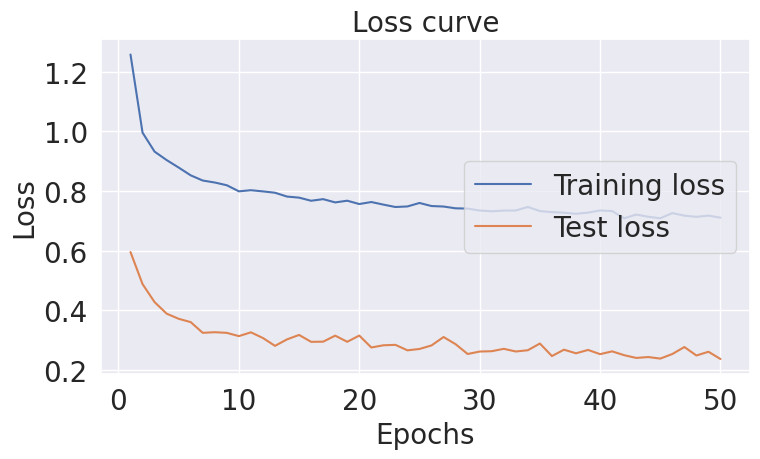

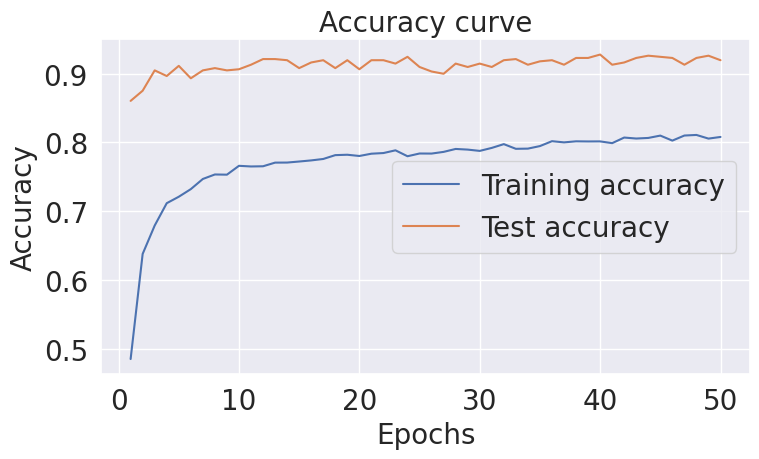

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8,5), dpi=100)
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Test loss')
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5), dpi=100)
epochs = range(1, len(loss) + 1)
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Test accuracy')
plt.title('Accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=5)
plt.tight_layout()
plt.show()

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [20]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("har_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("har_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 70276 bytes


## Encode the Model in an Arduino Header File 

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [21]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat har_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 433,404 bytes.


# Fine-tuning

### Get Arduino data

In [7]:
def open_log(file):
    with open(file, 'r') as f:
        x = f.read().split('\n')[3:-1]
    y = []
    y_ = []
    for i in range(len(x)):
        if x[i] == ['']:
            continue 
        a = x[i].split(',')
        for j in range(len(a)):
            y_.append(float(a[j][3:]))
        if len(y_) == 500*6:
            y.append(np.stack(y_).reshape((500, 6)))
            y_ = []
    return [np.stack(y), [int(file[0])-1]*len(y)]

files = [str(i)+'v.log' for i in range(1, 7)] # User 1 data used for calibration

mean = np.stack([-0.86362667, 0.00377767, -0.18852233, -0.793974, 1.78418783, 0.56001583]) 
std = np.stack([0.27513757, 0.18310183, 0.41220386, 26.54400976, 21.2698579, 14.8689249]) 

# standardize the data
data = [open_log(file) for file in files]
signals = [data[i][0] for i in range(len(data))]
signals = (np.concatenate(signals, axis=0) - mean) / std
labels = np.hstack([data[i][1] for i in range(len(data))])

labels = np.array([ONE_HOT_ENCODED_ACTIONS[i] for i in labels])

files = [str(i)+'s.log' for i in range(1, 7)] # User 2 data used for testing purposes

data = [open_log(file) for file in files]
test_signals = [data[i][0] for i in range(len(data))]
test_signals = (np.concatenate(test_signals, axis=0) - mean) / std
test_labels = np.hstack([data[i][1] for i in range(len(data))])
test_labels = np.array([ONE_HOT_ENCODED_ACTIONS[i] for i in test_labels])

In [118]:
# load saved model to calibrate
model = tf.keras.models.load_model('/content/drive/MyDrive/model')
model.get_layer('conv2d').trainable = False
model.get_layer('conv2d_1').trainable = False
model.get_layer('conv2d_2').trainable = False
model.get_layer('conv2d_3').trainable = False
model.get_layer('dense').trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 500, 6, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 226, 6, 16)        816       
                                                                 
 conv2d_1 (Conv2D)           (None, 89, 6, 16)         12816     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 6, 16)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 6, 16)         1296      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 6, 16)          1296      
                                                        

In [119]:
# Add calibration layer to process input
input = tf.keras.layers.Input((500, 6))
unstacked = tf.keras.layers.Lambda(lambda x: tf.unstack(x, axis=1))(input)
dense_layer = tf.keras.layers.Dense(6)
dense_outputs = [dense_layer(x) for x in unstacked]
stacked = tf.keras.layers.Lambda(lambda x: tf.stack(x, axis=1))(dense_outputs)
output = model(stacked)
fine_model = tf.keras.Model(input, output)

In [126]:
class EarlyStopping(tf.keras.callbacks.Callback):

    def __init__(self, monitor='accuracy', value=1.0, verbose=0):
        super(tf.keras.callbacks.Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current >= self.value:
            if self.verbose > 0:
                print("\nEpoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [130]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
es = EarlyStopping(monitor='accuracy', value=1.0, verbose=1)
fine_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_crossentropy', 'accuracy'])
history = fine_model.fit(signals, labels, epochs=50, batch_size=19, callbacks=[es])

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.4294 - categorical_crossentropy: 0.4294 - accuracy: 0.8421
Epoch 2/50
1/1 [==============================] - 0s 35ms/step - loss: 0.5438 - categorical_crossentropy: 0.5438 - accuracy: 0.8421
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 0.7746 - categorical_crossentropy: 0.7746 - accuracy: 0.6842
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 0.4286 - categorical_crossentropy: 0.4286 - accuracy: 0.8421
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 0.4140 - categorical_crossentropy: 0.4140 - accuracy: 0.8421
Epoch 6/50
1/1 [==============================] - 0s 31ms/step - loss: 0.6093 - categorical_crossentropy: 0.6093 - accuracy: 0.7895
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 0.5617 - categorical_crossentropy: 0.5617 - accuracy: 0.7895
Epoch 8/50
1/1 [==============================] - 0s 38ms/step - loss: 0.5444 

In [ ]:
# predict on user 1 data
tf.keras.backend.argmax(fine_model.predict(signals, batch_size=6), axis=-1), tf.keras.backend.argmax(labels, axis=-1)

4/4 [==============================] - 2s 14ms/step


(<tf.Tensor: shape=(19,), dtype=int64, numpy=array([0, 0, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5])>,
 <tf.Tensor: shape=(19,), dtype=int64, numpy=array([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5])>)

In [ ]:
# predict on user 2 data
tf.keras.backend.argmax(fine_model.predict(test_signals, batch_size=6), axis=-1), tf.keras.backend.argmax(test_labels, axis=-1)

3/3 [==============================] - 0s 13ms/step


(<tf.Tensor: shape=(15,), dtype=int64, numpy=array([2, 2, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5])>,
 <tf.Tensor: shape=(15,), dtype=int64, numpy=array([0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5])>)

In [136]:
# get calibration layer parameters
fine_model.get_layer('dense_2007').get_weights()

[array([[-0.21581484,  0.4697805 , -0.7174115 ,  0.15214415,  0.5649091 ,
          0.50473434],
        [ 0.14478123, -0.37991464,  0.33274716,  0.01606859,  0.28777984,
         -0.3698721 ],
        [-0.5035822 , -0.18120071, -0.36987996, -0.06454189,  0.15741514,
         -0.69464326],
        [ 0.03027846,  0.55594224,  0.57858384, -0.17820507, -0.1533395 ,
          0.3219829 ],
        [-0.26697952, -0.5761307 , -0.49397665,  0.23984799, -0.3954151 ,
          0.44500217],
        [ 0.6101277 , -0.6913353 ,  0.33950216,  0.7703384 , -0.51113415,
          0.35960424]], dtype=float32),
 array([ 0.00857501,  0.08086778,  0.2608107 ,  0.13189144,  0.05366264,
        -0.01997638], dtype=float32)]

## Plot arduino data

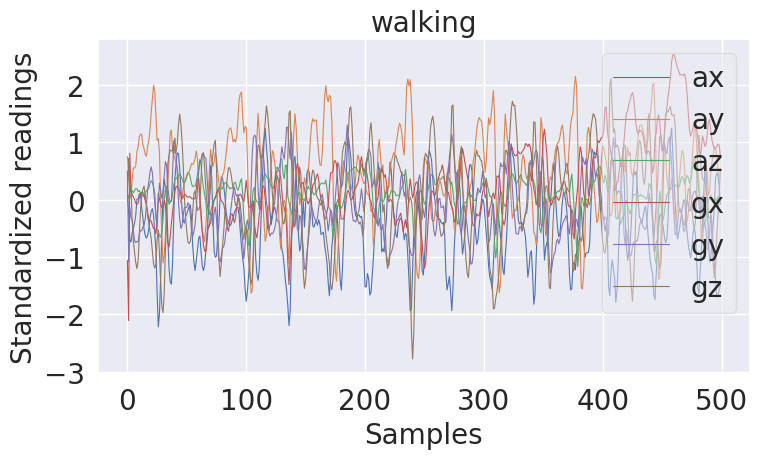

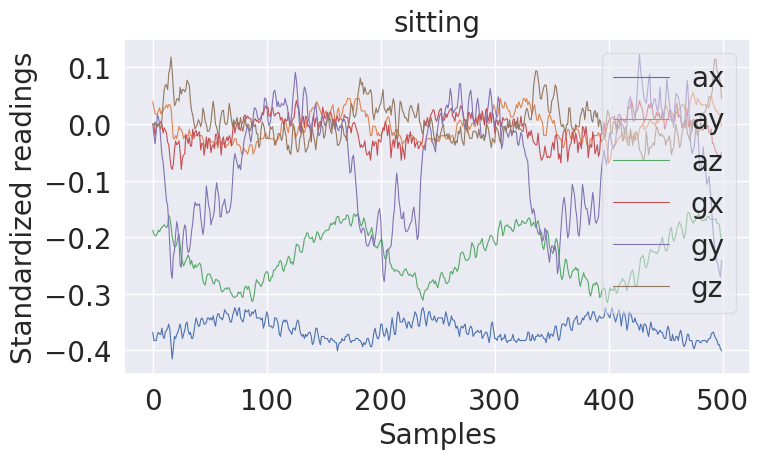

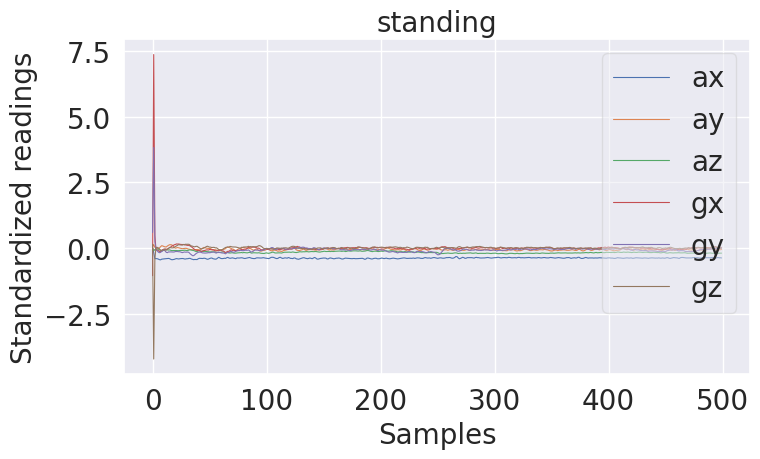

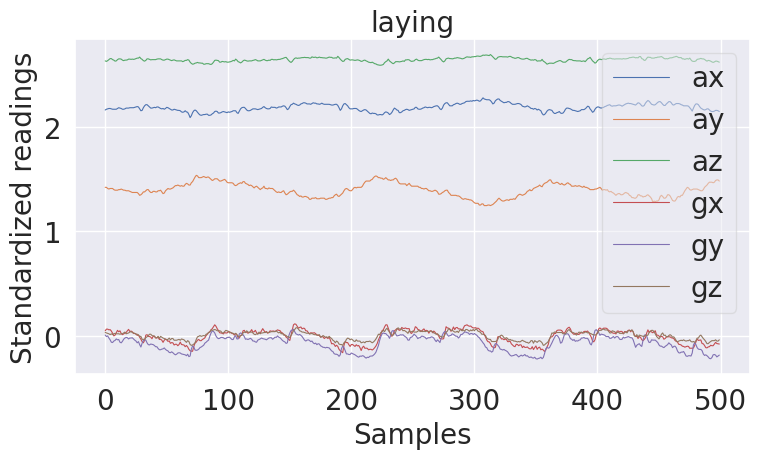

In [16]:
for i in [0, 3, 4, 5]:
    ind = (np.argmax(labels, axis=1) == i)
    x = (signals[ind])[np.random.randint(ind.sum())]
    plt.figure(figsize=(8,5), dpi=100)
    plt.plot(x[:, 0], label='ax', linewidth=0.8)
    plt.plot(x[:, 1], label='ay', linewidth=0.8)
    plt.plot(x[:, 2], label='az', linewidth=0.8)
    plt.plot(x[:, 3], label='gx', linewidth=0.8)
    plt.plot(x[:, 4], label='gy', linewidth=0.8)
    plt.plot(x[:, 5], label='gz', linewidth=0.8)
    plt.xlabel('Samples')
    plt.ylabel('Standardized readings')
    plt.legend(loc=1, framealpha=0.5)
    plt.title(Keys[i])
    plt.tight_layout()
    plt.show()

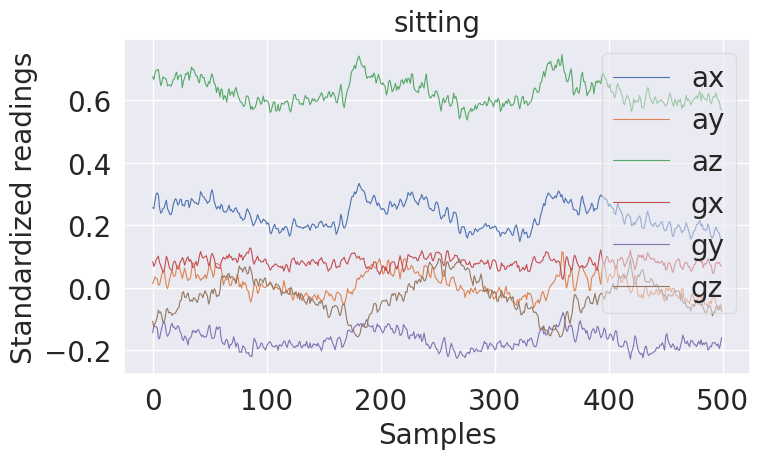

In [15]:
def process(X):
    y = []
    for i in range(len(X)):
        x = X[i]
        a1, a2, a3, a4, a5, a6 = x[0], x[1], x[2], x[3], x[4], x[5]
        b1 = a1 * -0.21581484 + a2 * 0.14478123 + a3 * -0.5035822 + a4 * 0.03027846 + a5 * -0.26697952 + a6 * 0.6101277 + 0.00857501
        b2 = a1 * 0.4697805 + a2 * -0.37991464 + a3 * -0.18120071 + a4 * 0.55594224 + a5 * -0.5761307 + a6 * -0.6913353 + 0.08086778
        b3 = a1 * -0.7174115 + a2 * 0.33274716 + a3 * -0.36987996 + a4 * 0.57858384 + a5 * -0.49397665 + a6 * 0.33950216 + 00.2608107
        b4 = a1 * 0.15214415 + a2 * 0.01606859 + a3 * -0.06454189 + a4 * -0.17820507 + a5 * 0.23984799 + a6 * 0.7703384 + 0.13189144
        b5 = a1 * 0.5649091 + a2 * 0.28777984 + a3 * 0.15741514 + a4 * -0.1533395 + a5 * -0.3954151 + a6 * -0.51113415 + 0.05366264
        b6 = a1 * 0.50473434 + a2 * -0.3698721 + a3 * -0.69464326 + a4 * 0.3219829 + a5 * 0.44500217 + a6 * 0.35960424 + -0.01997638
        y.append([b1, b2, b3, b4, b5, b6])
    return np.stack(y)

for i in [3]:
    ind = (np.argmax(labels, axis=1) == i)
    x = (signals[ind])[np.random.randint(ind.sum())]
    x = process(x)
    plt.figure(figsize=(8,5), dpi=100)
    plt.plot(x[:, 0], label='ax', linewidth=0.8)
    plt.plot(x[:, 1], label='ay', linewidth=0.8)
    plt.plot(x[:, 2], label='az', linewidth=0.8)
    plt.plot(x[:, 3], label='gx', linewidth=0.8)
    plt.plot(x[:, 4], label='gy', linewidth=0.8)
    plt.plot(x[:, 5], label='gz', linewidth=0.8)
    plt.xlabel('Samples')
    plt.ylabel('Standardized readings')
    plt.legend(loc=1, framealpha=0.5)
    plt.title(Keys[i])
    plt.tight_layout()
    plt.show()